In [48]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Data Sources

We imported data a list of tracks from spotify's top 200 list in canada and used track information from spotify's API.

In [4]:
#top 200 hundred songs in Canada
CA_20200311_file = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)
CA_Q1_file = pd.read_csv('Resources/regional-ca-daily-2019-03-31.csv', header = 1)
CA_Q2_file = pd.read_csv('Resources/regional-ca-daily-2019-06-30.csv', header = 1)
CA_Q3_file = pd.read_csv('Resources/regional-ca-daily-2019-09-30.csv', header = 1)
CA_Q4_file = pd.read_csv('Resources/regional-ca-daily-2019-12-31.csv', header = 1)

top_songs_CA_Q1 = pd.DataFrame(CA_Q1_file)
top_songs_CA_Q2 = pd.DataFrame(CA_Q2_file)
top_songs_CA_Q3 = pd.DataFrame(CA_Q3_file)
top_songs_CA_Q4 = pd.DataFrame(CA_Q4_file)

top_songs_CA_Q1.head()

,Position,Track Name,Artist,Streams,URL
0,1,bad guy,Billie Eilish,288698,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...
1,2,Old Town Road,Lil Nas X,188943,https://open.spotify.com/track/53CJANUxooaqGOt...
2,3,wish you were gay,Billie Eilish,188177,https://open.spotify.com/track/3Fj47GNK2kUF0ua...
3,4,bury a friend,Billie Eilish,151088,https://open.spotify.com/track/4SSnFejRGlZikf0...
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,146852,https://open.spotify.com/track/3KkXRkHbMCARz0a...


In [5]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

master_dictionary = {}

#create a dictionary of a dictionary for the extracted data from the api
for index, dataF in enumerate(df_list):

    #Create data frame of Q1 data
    dictionary = {}
    dictionary['Duration'] = []

    for i,x in dataF.iterrows():
        dictionary['Duration'].append('hello')
    
    master_dictionary[index] = dictionary

In [6]:
#Get json output of a track
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
#pprint(track)

# Create Dataframe of needed information

In [7]:
#sample = top_songs_CA_Q1[:50].copy()

### Pull data for all for Quarters

In [8]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

#create empty master dictionary for loop below that accumulate extracted api data
master_dictionary = {}

#Create data frame for each quarter data
for index, dataF in enumerate(df_list):
    
    dictionary = {}
    dictionary['Duration'] = []
    dictionary['Popularity'] = []
    dictionary['Track Name'] = []
    dictionary['Artist Name'] = []
    dictionary['Tempo'] = []
    dictionary['Valence'] = []
    dictionary['Speechiness'] = []
    dictionary['Danceability'] = []

    #pulls data for each track in each quarter
    for i,x in dataF.iterrows():
        url = dataF.loc[i,'URL']
        track = sp.track(url)
        audio_features = sp.audio_features(url)
        dictionary['Duration'].append(track['duration_ms'])
        dictionary['Popularity'].append(track['popularity'])
        dictionary['Track Name'].append(track['name'])
        dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
        dictionary['Tempo'].append(audio_features[0]['tempo'])
        dictionary['Valence'].append(audio_features[0]['valence'])
        dictionary['Speechiness'].append(audio_features[0]['speechiness'])
        dictionary['Danceability'].append(audio_features[0]['danceability'])
    
    #append quarter dictionary to master dictionary
    master_dictionary[index] = dictionary

retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


### Break master dictionary into dataframe for each quarter

In [9]:
#set dataframes
df_Q1 = pd.DataFrame(master_dictionary[0])
df_Q2 = pd.DataFrame(master_dictionary[1])
df_Q3 = pd.DataFrame(master_dictionary[2])
df_Q4 = pd.DataFrame(master_dictionary[3])

quart_df_list = [df_Q1 ,df_Q2 ,df_Q3 ,df_Q4 ]

#add quarter variable into each dataframe
quarter = 1
for dataF in quart_df_list:
    dataF['Quarter'] = quarter
    quarter = quarter + 1
    
#add streams columns from original csv to final data frame
df_Q1['Streams'] = top_songs_CA_Q1['Streams']
df_Q2['Streams'] = top_songs_CA_Q2['Streams']
df_Q3['Streams'] = top_songs_CA_Q3['Streams']
df_Q4['Streams'] = top_songs_CA_Q4['Streams']

df_Q1.head()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


In [10]:
#Create merge dataframe with all for quarters
merged_df = pd.DataFrame()
for dataF in quart_df_list:
    merged_df=merged_df.append(dataF,ignore_index=True)
    
print(len(merged_df))
merged_df.head()

800


,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


# Sample Plots

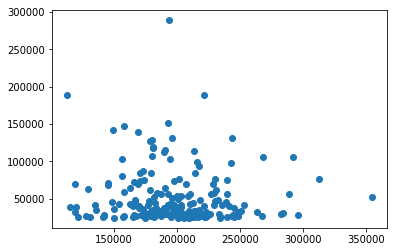

In [11]:
plt.scatter(df_Q1['Duration'], df_Q1['Streams'])
plt.show()

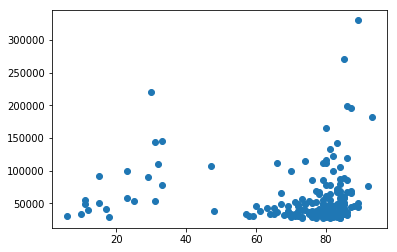

In [12]:
plt.scatter(df_Q2['Popularity'], df_Q2['Streams'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a193bab50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a193badd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x116163490>],
 'medians': [<matplotlib.lines.Line2D at 0x1a193c5cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a193c5e10>],
 'means': []}

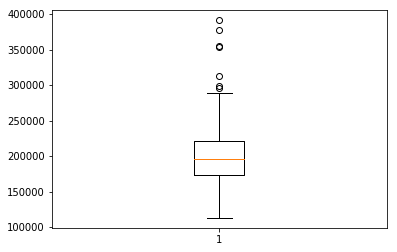

In [13]:
plt.boxplot(df_Q2['Duration'])

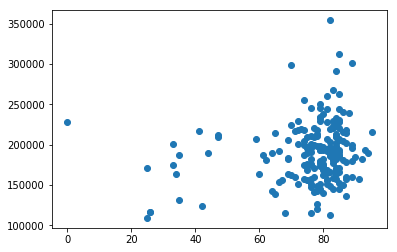

In [14]:
plt.scatter(df_Q3['Popularity'], df_Q3['Duration'])
plt.show()

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Streams'])
rvalue

-0.032882435202707415

# Duration Analysis

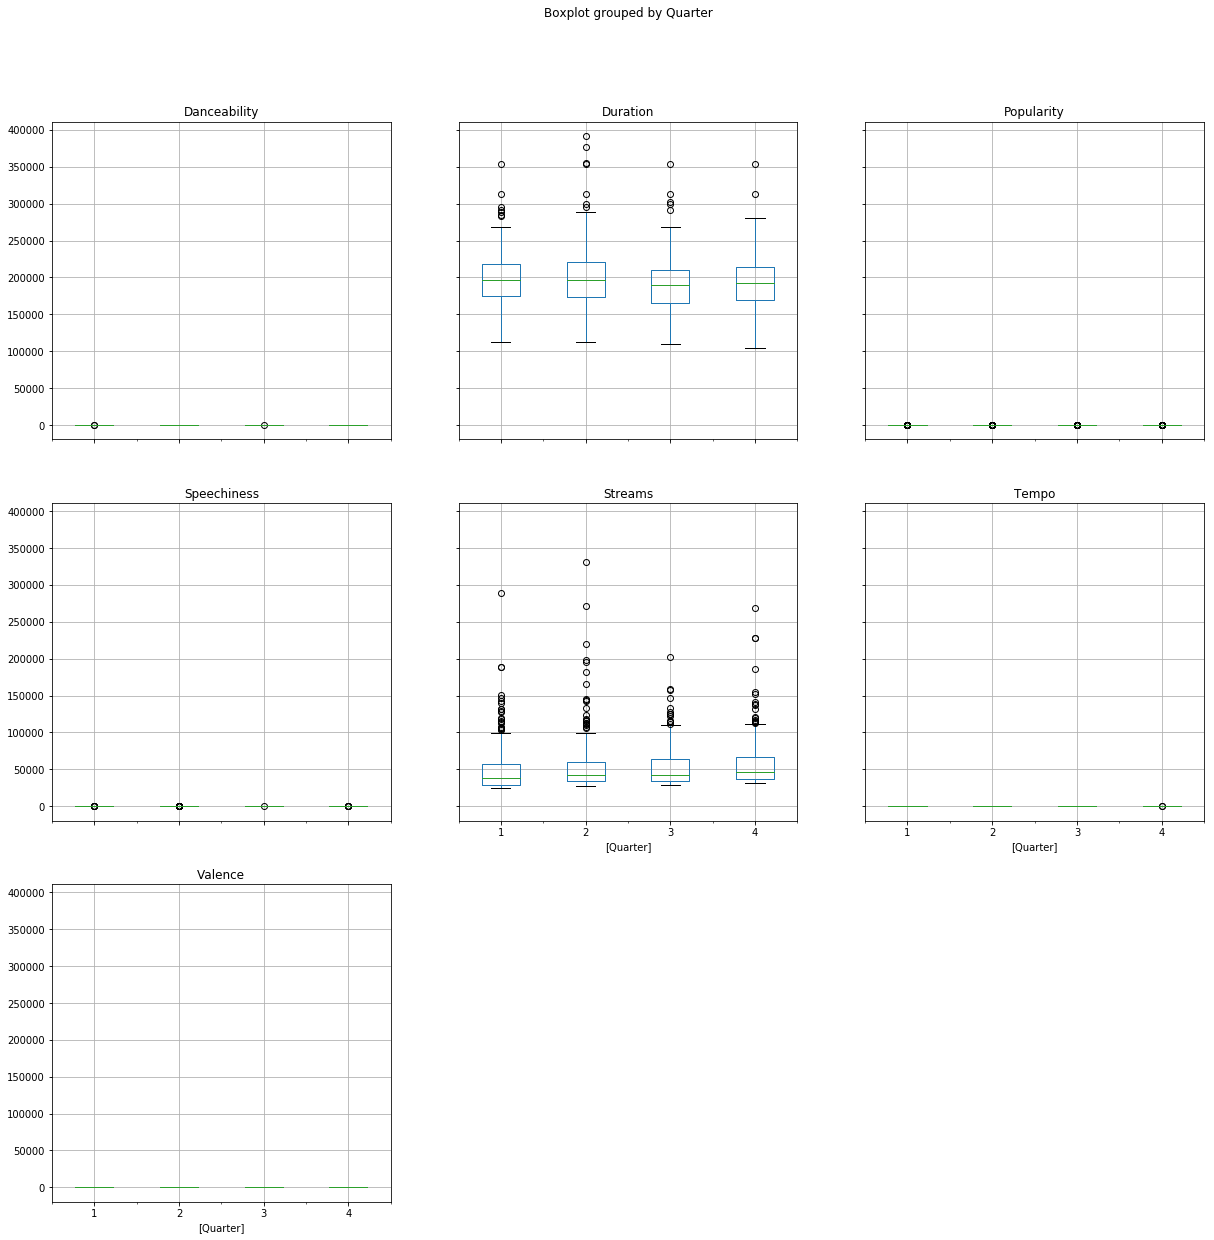

In [24]:
image = merged_df.boxplot(by= 'Quarter', figsize=(20,20))

#image.figure(figsize=(20,20))

plt.show()


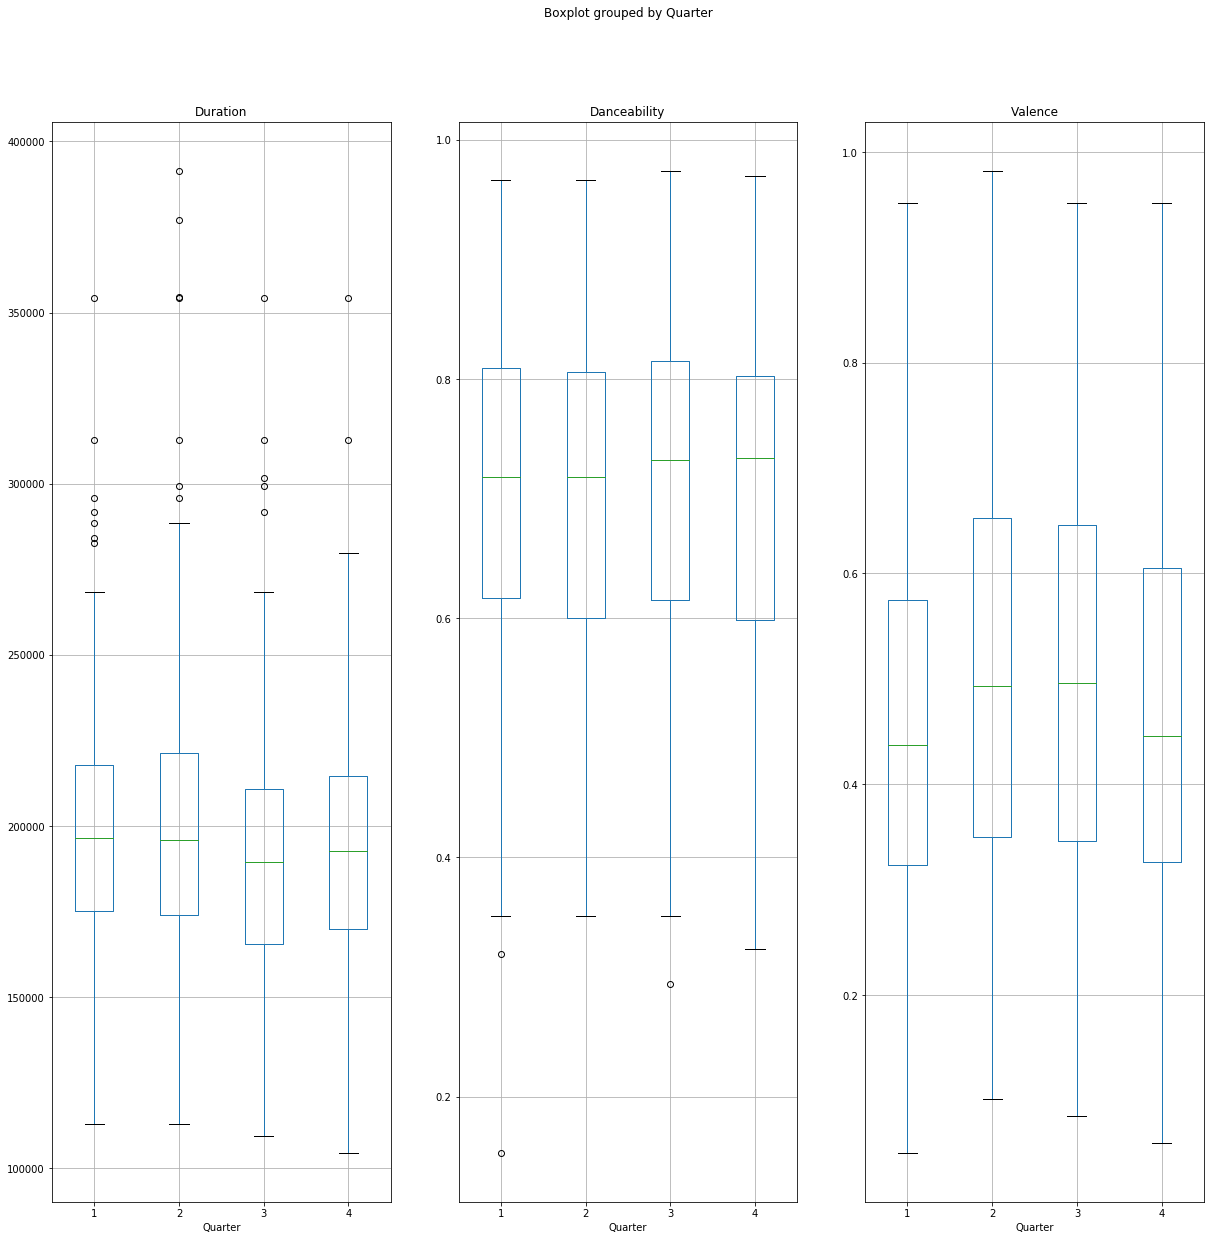

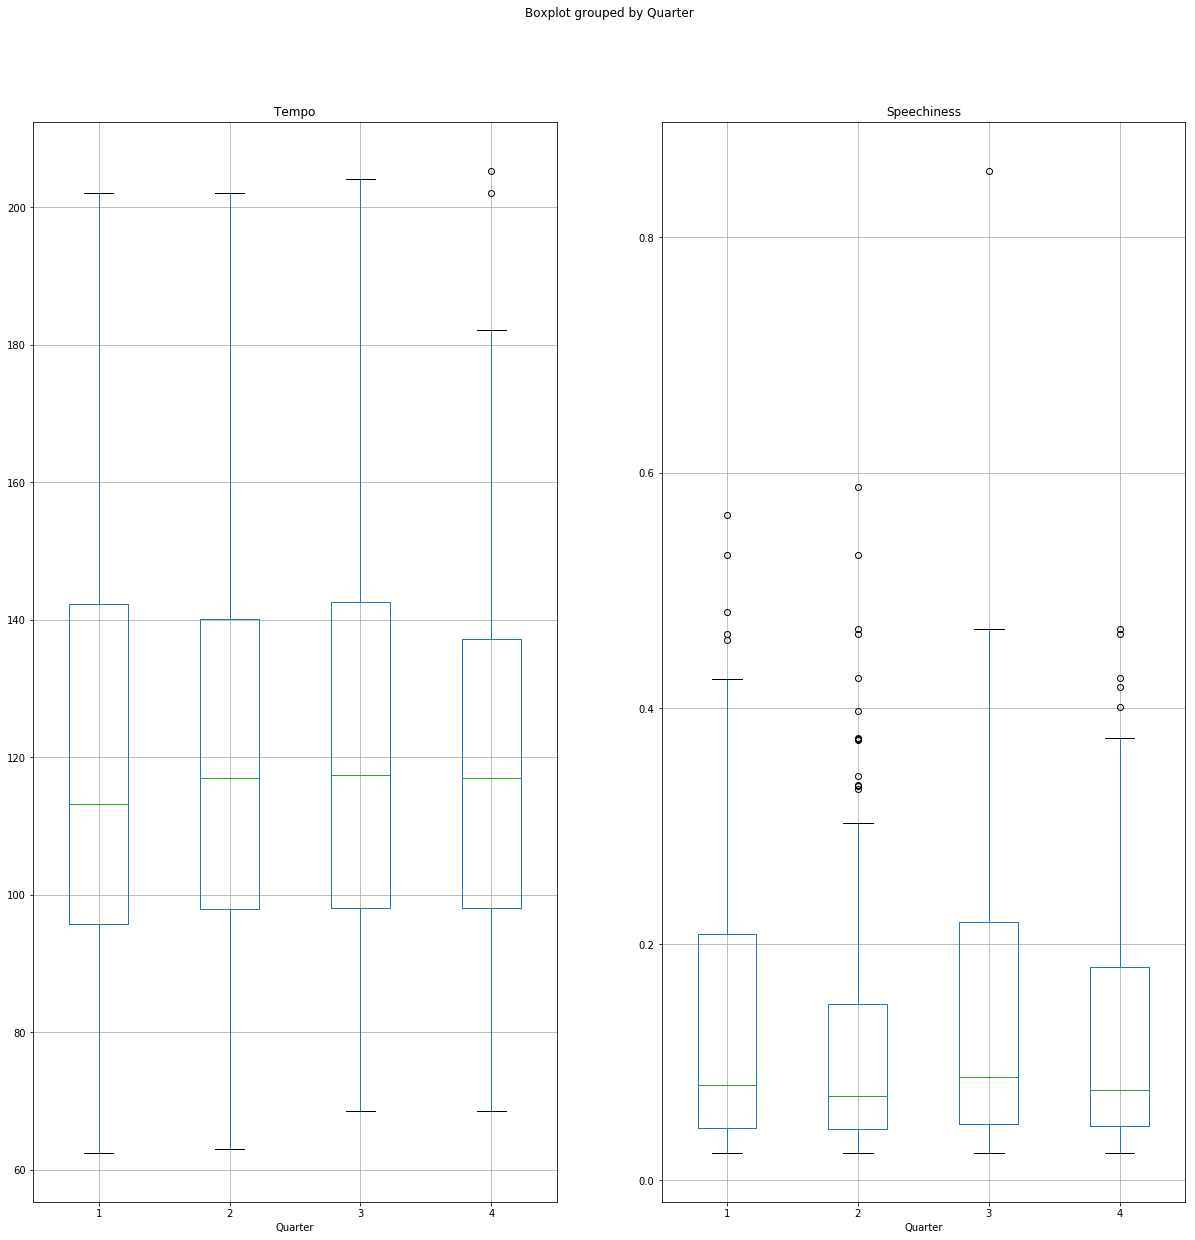

In [47]:
fig, axs = plt.subplots(1,3,figsize=(20, 20), sharey=False)
fig, ax2 = plt.subplots(1,2,figsize=(20, 20), sharey=False)
merged_df.boxplot(['Duration','Danceability', 'Valence'], 'Quarter', axs)
merged_df.boxplot(['Tempo', 'Speechiness'], 'Quarter', ax2)
plt.show()

In [49]:
stats.f_oneway(df_Q1['Duration'], df_Q2['Duration'], df_Q3['Duration'], df_Q4['Duration'])

F_onewayResult(statistic=3.431485492240734, pvalue=0.016671608840744513)

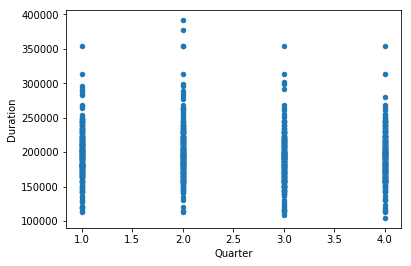

In [52]:
merged_df.plot.scatter(y='Duration', x='Quarter')

In [80]:
duration_quarters = merged_df.groupby('Quarter').mean()
duration_quarters.head()

,Duration,Popularity,Tempo,Valence,Speechiness,Danceability,Streams
Quarter,,,,,,,
1,197677.160,71.225,117.806420,0.441819,0.137655,0.705750,51413.46
2,201676.830,73.055,119.556690,0.508215,0.116193,0.706060,56983.13
3,190320.195,76.065,120.992890,0.501311,0.143260,0.711440,54346.11
4,193037.090,81.710,118.938155,0.463131,0.124981,0.705295,58987.33


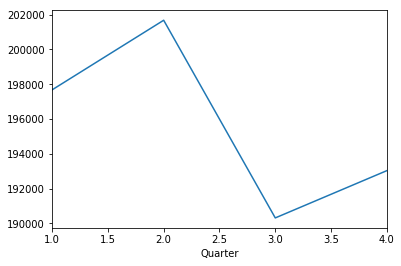

In [83]:
duration_quarters['Duration'].plot()

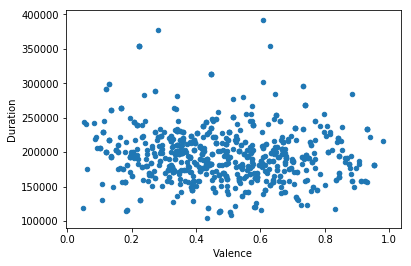

In [53]:
merged_df.plot.scatter(y='Duration', x='Valence')

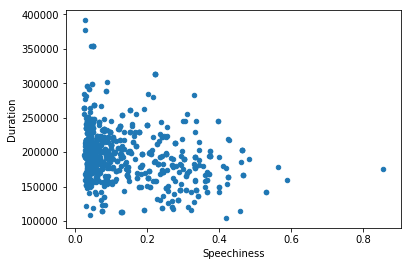

In [54]:
merged_df.plot.scatter(y='Duration', x='Speechiness')

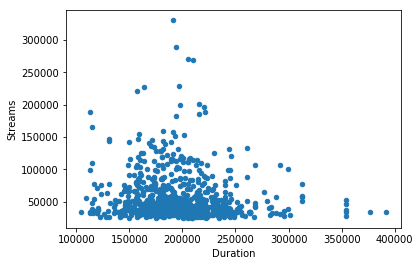

In [84]:
merged_df.plot.scatter(x='Duration', y='Streams')

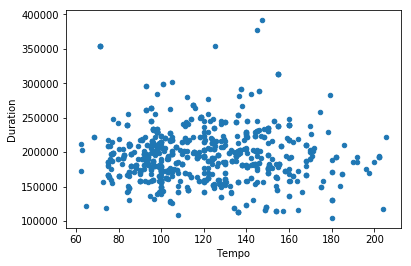

In [55]:
merged_df.plot.scatter(y='Duration', x='Tempo')

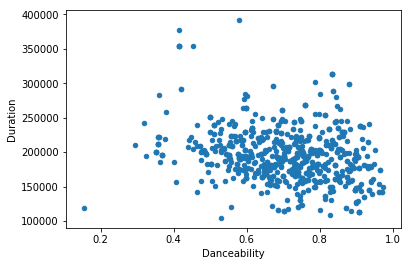

In [57]:
merged_df.plot.scatter(y='Duration', x='Danceability')

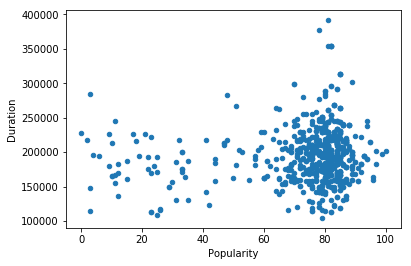

In [58]:
merged_df.plot.scatter(y='Duration', x='Popularity')

In [64]:
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Valence'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Danceability'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Tempo'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Speechiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Popularity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.11
The correlation between both factors is -0.25
The correlation between both factors is -0.04
The correlation between both factors is -0.24
The correlation between both factors is 0.12


In [77]:
df_Q1.name = 'Q1'
df_Q2.name = 'Q2'
df_Q3.name = 'Q3'
df_Q4.name = 'Q4'

In [74]:
def do_correlation(df, var1, var2):
    correlation = stats.pearsonr(df[var1],df[var2])
    
    print(f"{df.name}: The correlation between {var1} and {var2} is {round(correlation[0],2)}")

In [78]:
print(f"Relationship between Duration and Valence across quarters")
do_correlation(df_Q1, 'Duration', 'Valence')
do_correlation(df_Q2, 'Duration', 'Valence')
do_correlation(df_Q3, 'Duration', 'Valence')
do_correlation(df_Q4, 'Duration', 'Valence')

Relationship between Duration and Valence across quarters
Q1: The correlation between Duration and Valence is -0.07
Q2: The correlation between Duration and Valence is -0.05
Q3: The correlation between Duration and Valence is -0.23
Q4: The correlation between Duration and Valence is -0.12


In [86]:
do_correlation(df_Q1, 'Duration', 'Streams')

Q1: The correlation between Duration and Streams is -0.07


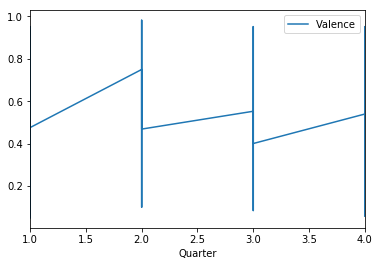

In [87]:
merged_df.plot(x='Quarter', y='Valence')

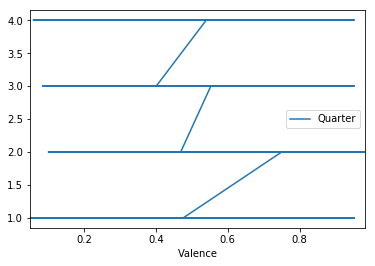

In [88]:
merged_df.plot(x='Valence', y='Quarter')

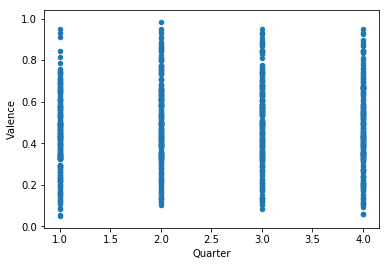

In [89]:
merged_df.plot.scatter(x='Quarter', y='Valence')

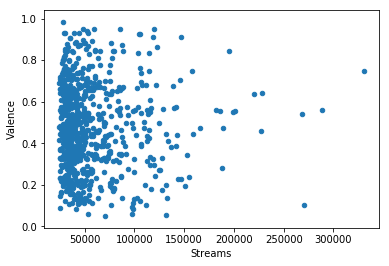

In [90]:
merged_df.plot.scatter(x='Streams', y='Valence')

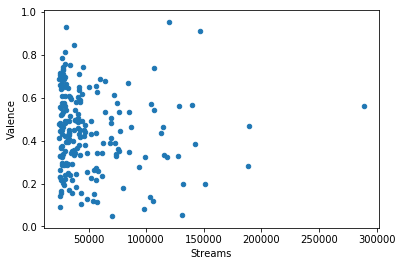

In [91]:
df_Q1.plot.scatter(x='Streams', y='Valence')

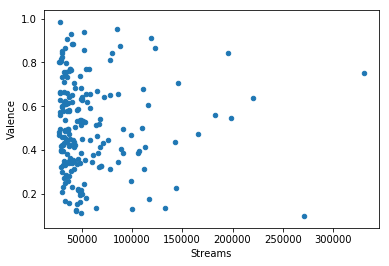

In [92]:
df_Q2.plot.scatter(x='Streams', y='Valence')

In [ ]:
fig, ax1 = subplo